

# Reading Data

In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Notebook Specifics

pd.set_option("max_rows", 20)
np.set_printoptions(suppress = True)
#Pretty Graphs

from seaborn import set_style
set_style("darkgrid")
import seaborn as sns

### Loading Data into a Test and a Training set
#### Testing Data = Summer 2016 

In [4]:

testing_csv_files = ["201606-citibike-tripdata.csv", "201608-citibike-tripdata.csv", "201607-citibike-tripdata.csv"]
testing = pd.DataFrame()
for filename in testing_csv_files:
    testing = testing.append(pd.read_csv(filename))

#### Training Data = Summer 2014 and Summer 2015

In [7]:
training_csv_files = ["2014-06 - Citi Bike trip data.csv",  "201506-citibike-tripdata.csv", "2014-07 - Citi Bike trip data.csv", "201507-citibike-tripdata.csv", "2014-08 - Citi Bike trip data.csv", "201508-citibike-tripdata.csv"]
training = pd.DataFrame()
for filename in training_csv_files:
    training = training.append(pd.read_csv(filename))

#### Inspecting Training data

In [11]:
training.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,520,2014-06-01 00:00:02,2014-06-01 00:08:42,358,Christopher St & Greenwich St,40.732916,-74.007114,426,West St & Chambers St,40.717548,-74.013221,18840,Subscriber,1979,1
1,520,2014-06-01 00:00:27,2014-06-01 00:09:07,335,Washington Pl & Broadway,40.729039,-73.994046,265,Stanton St & Chrystie St,40.722293,-73.991475,17442,Customer,\N,0
2,414,2014-06-01 00:00:32,2014-06-01 00:07:26,439,E 4 St & 2 Ave,40.726281,-73.989780,368,Carmine St & 6 Ave,40.730386,-74.002150,16447,Subscriber,1980,1
3,310,2014-06-01 00:00:34,2014-06-01 00:05:44,463,9 Ave & W 16 St,40.742065,-74.004432,380,W 4 St & 7 Ave S,40.734011,-74.002939,18218,Subscriber,1984,1
4,457,2014-06-01 00:00:35,2014-06-01 00:08:12,352,W 56 St & 6 Ave,40.763406,-73.977225,305,E 58 St & 3 Ave,40.760958,-73.967245,18115,Subscriber,1969,1


In [12]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6075150 entries, 0 to 1179043
Data columns (total 15 columns):
tripduration               int64
starttime                  object
stoptime                   object
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 object
gender                     int64
dtypes: float64(4), int64(5), object(6)
memory usage: 741.6+ MB


#### Since the training Data only has the tripduration column that is an "int" and has any sense of numerical computation  

In [13]:
training["tripduration"].describe()

count    6.075150e+06
mean     9.255700e+02
std      5.063122e+03
min      6.000000e+01
25%      4.110000e+02
50%      6.650000e+02
75%      1.103000e+03
max      5.174309e+06
Name: tripduration, dtype: float64

In [14]:
training.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            1179034, 1179035, 1179036, 1179037, 1179038, 1179039, 1179040,
            1179041, 1179042, 1179043],
           dtype='int64', length=6075150)

In [15]:
training.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

##### Sanity Checks

In [16]:
training.columns.difference(testing.columns) #To check that the heading of our test Data and Training Data are the same
                                             # Since object return is empty, this implies that they have the same headings

Index([], dtype='object')

In [17]:
training.columns.equals(testing.columns)      #Object returned is true, so both have the same headings. 

True

In [18]:
training.ix[[5,10,15]]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
5,399,2014-06-01 00:00:43,2014-06-01 00:07:22,293,Lafayette St & E 8 St,40.730287,-73.990765,247,Perry St & Bleecker St,40.735354,-74.004831,18527,Subscriber,1970,1
5,690,6/1/2015 0:03,6/1/2015 0:15,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,410,Suffolk St & Stanton St,40.720664,-73.985180,20857,Subscriber,1976,1
5,2245,2014-07-01 00:01:09,2014-07-01 00:38:34,416,Cumberland St & Lafayette Ave,40.687534,-73.972652,473,Rivington St & Chrystie St,40.721101,-73.991925,20653,Subscriber,1976,1
5,603,7/1/2015 00:01:00,7/1/2015 00:11:04,455,1 Ave & E 44 St,40.750020,-73.969053,367,E 53 St & Lexington Ave,40.758281,-73.970694,17069,Subscriber,1953,1
5,308,2014-08-01 00:00:17,2014-08-01 00:05:25,477,W 41 St & 8 Ave,40.756405,-73.990026,478,11 Ave & W 41 St,40.760301,-73.998842,19797,Subscriber,1958,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,635,6/1/2015 0:13,6/1/2015 0:24,480,W 53 St & 10 Ave,40.766697,-73.990617,490,8 Ave & W 33 St,40.751551,-73.993934,15170,Subscriber,1976,1
15,653,2014-07-01 00:02:04,2014-07-01 00:12:57,504,1 Ave & E 15 St,40.732219,-73.981656,334,W 20 St & 7 Ave,40.742388,-73.997262,15645,Subscriber,1964,2
15,463,7/1/2015 00:02:26,7/1/2015 00:10:10,527,E 33 St & 2 Ave,40.744023,-73.976056,491,E 24 St & Park Ave S,40.740964,-73.986022,20346,Subscriber,1963,1
15,1440,2014-08-01 00:01:09,2014-08-01 00:25:09,515,W 43 St & 10 Ave,40.760094,-73.994618,355,Bayard St & Baxter St,40.716021,-73.999744,14722,Subscriber,1989,1


In [19]:
training[["starttime", "stoptime" ,"start station name" , "end station name"] ]

,starttime,stoptime,start station name,end station name
0,2014-06-01 00:00:02,2014-06-01 00:08:42,Christopher St & Greenwich St,West St & Chambers St
1,2014-06-01 00:00:27,2014-06-01 00:09:07,Washington Pl & Broadway,Stanton St & Chrystie St
2,2014-06-01 00:00:32,2014-06-01 00:07:26,E 4 St & 2 Ave,Carmine St & 6 Ave
3,2014-06-01 00:00:34,2014-06-01 00:05:44,9 Ave & W 16 St,W 4 St & 7 Ave S
4,2014-06-01 00:00:35,2014-06-01 00:08:12,W 56 St & 6 Ave,E 58 St & 3 Ave
...,...,...,...,...
1179039,8/31/2015 23:58:43,9/1/2015 00:05:47,Vernon Blvd & 50 Ave,McGuinness Blvd & Eagle St
1179040,8/31/2015 23:58:54,9/1/2015 00:15:56,E 39 St & 2 Ave,W Broadway & Spring St
1179041,8/31/2015 23:59:11,9/1/2015 00:30:47,Sullivan St & Washington Sq,Atlantic Ave & Fort Greene Pl
1179042,8/31/2015 23:59:16,9/1/2015 00:13:02,Division Ave & Marcy Ave,Lafayette Ave & Classon Ave


In [20]:
type(training[["starttime"]])

pandas.core.frame.DataFrame

In [21]:
type(training["starttime"])

pandas.core.series.Series

In [22]:
training.ix[[5,10,15], ["starttime", "stoptime" ,"start station name" , "end station name"]]

,starttime,stoptime,start station name,end station name
5,2014-06-01 00:00:43,2014-06-01 00:07:22,Lafayette St & E 8 St,Perry St & Bleecker St
5,6/1/2015 0:03,6/1/2015 0:15,Greenwich Ave & 8 Ave,Suffolk St & Stanton St
5,2014-07-01 00:01:09,2014-07-01 00:38:34,Cumberland St & Lafayette Ave,Rivington St & Chrystie St
5,7/1/2015 00:01:00,7/1/2015 00:11:04,1 Ave & E 44 St,E 53 St & Lexington Ave
5,2014-08-01 00:00:17,2014-08-01 00:05:25,W 41 St & 8 Ave,11 Ave & W 41 St
...,...,...,...,...
15,6/1/2015 0:13,6/1/2015 0:24,W 53 St & 10 Ave,8 Ave & W 33 St
15,2014-07-01 00:02:04,2014-07-01 00:12:57,1 Ave & E 15 St,W 20 St & 7 Ave
15,7/1/2015 00:02:26,7/1/2015 00:10:10,E 33 St & 2 Ave,E 24 St & Park Ave S
15,2014-08-01 00:01:09,2014-08-01 00:25:09,W 43 St & 10 Ave,Bayard St & Baxter St


end station name    usertype
start station name                                                           
1 Ave & E 15 St              count                          31884       31884
                             unique                           334           2
                             top                  E 23 St & 1 Ave  Subscriber
                             freq                            1031       29568
1 Ave & E 18 St              count                          19161       19161
                             unique                           308           2
                             top               E 17 St & Broadway  Subscriber
                             freq                             661       17485
1 Ave & E 30 St              count                          24029       24029
                             unique                           319           2
...                                                           ...         ...
Wythe Ave & Metropolitan Ave top     Wythe Ave & Metropolitan Ave  Subscriber
                             freq                             766        9122
Yankee Ferry Terminal        count                           1040        1040
                             unique                             7           2
                             top            Yankee Ferry Terminal    Customer
                             freq                             555         695
York St & Jay St             count                          12179       12179
                             unique                           333           2
                             top       Flushing Ave & Carlton Ave  Subscriber
                             freq                             604        9934

[1736 rows x 2 columns]

In [24]:
grouper = training.groupby("start station name")

In [25]:
grouper

In [26]:
map_ssn = grouper["start station id"].unique()  #unique displays a list of unique pandas array items
map_ssn.sort_values(inplace = True)

with pd.option_context("max_rows", 20):      #a context manager to setup display manager 
    print(map_ssn)                           #show a max of 20 columns

start station name
W 52 St & 11 Ave                   [72]
Franklin St & W Broadway           [79]
St James Pl & Pearl St             [82]
Atlantic Ave & Fort Greene Pl      [83]
W 17 St & 8 Ave                   [116]
Park Ave & St Edwards St          [119]
Lexington Ave & Classon Ave       [120]
Barrow St & Hudson St             [127]
MacDougal St & Prince St          [128]
E 56 St & Madison Ave             [137]
                                  ...  
21 St & Queens Plaza North       [3130]
E 67 St & Park Ave               [3133]
W 63 St & Broadway               [3158]
Park Ave & Marcus Garvey Blvd    [3179]
Brooklyn Bridge Park - Pier 2    [3180]
Soissons Landing                 [3181]
Yankee Ferry Terminal            [3182]
Hanson Pl & St Felix St          [3222]
E 55 St & 3 Ave                  [3223]
W 13 St & Hudson St              [3224]
Name: start station id, dtype: object


In [27]:
map_ssn2 = grouper["start station id"].apply(lambda x : x.unique()[0])  #Syntax sugar to output an integer instead of an array
map_ssn2.sort_values(inplace = True)

with pd.option_context("max_rows", 20):      #a context manager to setup display manager 
    print(map_ssn2)                           #show a max of 20 columns

start station name
W 52 St & 11 Ave                   72
Franklin St & W Broadway           79
St James Pl & Pearl St             82
Atlantic Ave & Fort Greene Pl      83
W 17 St & 8 Ave                   116
Park Ave & St Edwards St          119
Lexington Ave & Classon Ave       120
Barrow St & Hudson St             127
MacDougal St & Prince St          128
E 56 St & Madison Ave             137
                                 ... 
21 St & Queens Plaza North       3130
E 67 St & Park Ave               3133
W 63 St & Broadway               3158
Park Ave & Marcus Garvey Blvd    3179
Brooklyn Bridge Park - Pier 2    3180
Soissons Landing                 3181
Yankee Ferry Terminal            3182
Hanson Pl & St Felix St          3222
E 55 St & 3 Ave                  3223
W 13 St & Hudson St              3224
Name: start station id, dtype: int64


<IPython.core.display.Javascript object>


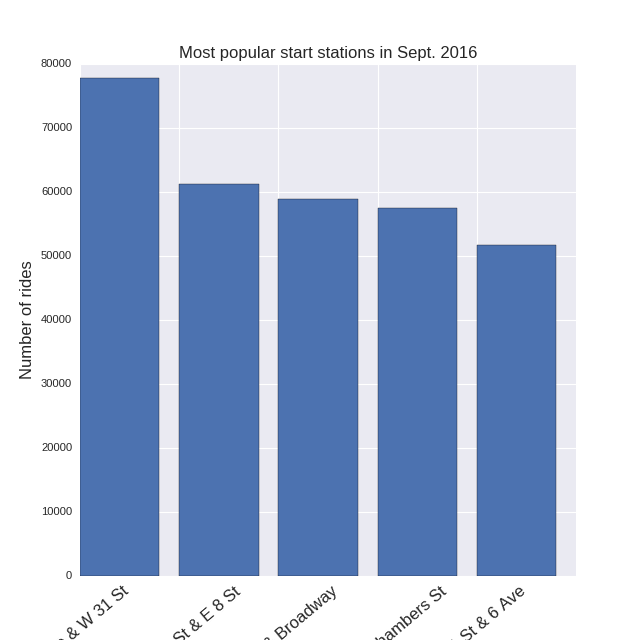

In [48]:
ax = training.groupby('start station name')['start station id'].count().reset_index()

ax.columns = ['Start Station', 'Count']
ax = ax.sort_values(by='Count', ascending=False).head()

# create bar graph
plt.figure(figsize=(8,8))
plt.bar(list(range(len(ax))), ax['Count'], 
            tick_label=ax['Start Station'])
plt.xticks(rotation=40, fontsize = 15)
plt.xlabel('Stations', fontsize = 15)
plt.ylabel('Number of rides', fontsize = 15)
plt.title('Most popular start stations in Sept. 2016', fontsize = 15)
print()

In [47]:
#dont use

bx = training.groupby('gender').size().plot(kind='barh', figsize=(8,8))

#ax.columns = ['Start Station', 'Count']
#ax = ax.sort_values(by='Count', ascending=False).head()

ylabel = bx.yaxis.get_label()
ylabel.set_fontsize(24)

labels = bx.xaxis.get_ticklabels()
[label.set_fontsize(20) for label in labels];

labels = bx.xaxis.get_ticklabels()
[label.set_fontsize(20) for label in labels]
[label.set_rotation(-45) for label in labels]

[None, None, None, None, None]

In [9]:
# seaborn is pretty cool
# might want to decrease data size before actually doing all that crap

#g = sns.factorplot(x = "gender", y = "usertype", data=training)

In [10]:
cat = pd.Categorical(training.gender)
cat.describe()

,counts,freqs
categories,,
0,908415,0.149530
1,3928644,0.646674
2,1238091,0.203796


In [16]:
cat1 = pd.Categorical(training.tripduration)
cat1.describe()

,counts,freqs
categories,,
60,779,1.282273e-04
61,790,1.300379e-04
62,797,1.311902e-04
63,702,1.155527e-04
64,729,1.199970e-04
...,...,...
2555456,1,1.646050e-07
2712082,1,1.646050e-07
2842280,1,1.646050e-07


In [19]:
training.groupby("gender").tripduration.mean().reset_index()

,gender,tripduration
0,0,1691.490279
1,1,756.940746
2,2,898.682366


In [21]:
training.groupby("gender").tripduration.median().reset_index()

,gender,tripduration
0,0,1218
1,1,580
2,2,698


In [28]:
training.filter(regex="time") #filter the data by regular expressions on columns. 

,starttime,stoptime
0,2014-06-01 00:00:02,2014-06-01 00:08:42
1,2014-06-01 00:00:27,2014-06-01 00:09:07
2,2014-06-01 00:00:32,2014-06-01 00:07:26
3,2014-06-01 00:00:34,2014-06-01 00:05:44
4,2014-06-01 00:00:35,2014-06-01 00:08:12
...,...,...
1179039,8/31/2015 23:58:43,9/1/2015 00:05:47
1179040,8/31/2015 23:58:54,9/1/2015 00:15:56
1179041,8/31/2015 23:59:11,9/1/2015 00:30:47
1179042,8/31/2015 23:59:16,9/1/2015 00:13:02


In [30]:
cat2 = pd.Categorical(training["start station name"])

In [32]:
cat2.describe()

,counts,freqs
categories,,
1 Ave & E 15 St,31884,0.005248
1 Ave & E 18 St,19161,0.003154
1 Ave & E 30 St,24029,0.003955
1 Ave & E 44 St,16069,0.002645
10 Ave & W 28 St,24405,0.004017
...,...,...
Willoughby Ave & Walworth St,3757,0.000618
Willoughby St & Fleet St,6003,0.000988
Wythe Ave & Metropolitan Ave,13110,0.002158


In [46]:
cat2      # can be treated like a dataframe

[Christopher St & Greenwich St, Washington Pl & Broadway, E 4 St & 2 Ave, 9 Ave & W 16 St, W 56 St & 6 Ave, ..., Vernon Blvd & 50 Ave, E 39 St & 2 Ave, Sullivan St & Washington Sq, Division Ave & Marcy Ave, E 31 St & 3 Ave]
Length: 6075150
Categories (434, object): [1 Ave & E 15 St, 1 Ave & E 18 St, 1 Ave & E 30 St, 1 Ave & E 44 St, ..., Willoughby St & Fleet St, Wythe Ave & Metropolitan Ave, Yankee Ferry Terminal, York St & Jay St]

In [47]:
cat2.codes

array([ 92, 419, 154, ..., 353, 114, 146], dtype=int16)

In [54]:
# replacing values using dictionaries
# in order to make data faster and easier, we will fill the usertype with 1 and 0's
# 1 meaning it is a subscriber, 0 meaning it is a customer
training.usertype.replace({"Subscriber": 1, "Customer":0}, inplace=True)

In [55]:
training.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,520,2014-06-01 00:00:02,2014-06-01 00:08:42,358,Christopher St & Greenwich St,40.732916,-74.007114,426,West St & Chambers St,40.717548,-74.013221,18840,1,1979,1
1,520,2014-06-01 00:00:27,2014-06-01 00:09:07,335,Washington Pl & Broadway,40.729039,-73.994046,265,Stanton St & Chrystie St,40.722293,-73.991475,17442,0,\N,0
2,414,2014-06-01 00:00:32,2014-06-01 00:07:26,439,E 4 St & 2 Ave,40.726281,-73.989780,368,Carmine St & 6 Ave,40.730386,-74.002150,16447,1,1980,1
3,310,2014-06-01 00:00:34,2014-06-01 00:05:44,463,9 Ave & W 16 St,40.742065,-74.004432,380,W 4 St & 7 Ave S,40.734011,-74.002939,18218,1,1984,1
4,457,2014-06-01 00:00:35,2014-06-01 00:08:12,352,W 56 St & 6 Ave,40.763406,-73.977225,305,E 58 St & 3 Ave,40.760958,-73.967245,18115,1,1969,1


In [60]:
print(training.usertype.mean())
stats=pd.Categorical(training["usertype"])
stats.describe()

0.8510519081833371


,counts,freqs
categories,,
0,904882,0.148948
1,5170268,0.851052


In [10]:
from sklearn.preprocessing import LabelBinarizer

In [8]:
training["start station name"].head(15).values

array(['Christopher St & Greenwich St', 'Washington Pl & Broadway',
       'E 4 St & 2 Ave', '9 Ave & W 16 St', 'W 56 St & 6 Ave',
       'Lafayette St & E 8 St', 'W 18 St & 6 Ave', 'W 22 St & 8 Ave',
       'Broadway & W 32 St', 'Allen St & E Houston St',
       'Allen St & E Houston St', 'Lafayette St & E 8 St',
       'Allen St & E Houston St', 'Allen St & E Houston St',
       'MacDougal St & Washington Sq'], dtype=object)

In [13]:
binarizer = LabelBinarizer() # initialize

In [67]:
# fit_transform is shorthand for calling fit then transform 
#fit does stuff it mutates the object and does the things you want it to do
# transform takes the input data and gives something back that is transformed. 
# so this is shorthand for calling both these methods

In [15]:
binarizer.fit_transform(training["start station name"].head(15))

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

In [16]:
binarizer.classes_

array(['9 Ave & W 16 St', 'Allen St & E Houston St', 'Broadway & W 32 St',
       'Christopher St & Greenwich St', 'E 4 St & 2 Ave',
       'Lafayette St & E 8 St', 'MacDougal St & Washington Sq',
       'W 18 St & 6 Ave', 'W 22 St & 8 Ave', 'W 56 St & 6 Ave',
       'Washington Pl & Broadway'], 
      dtype='<U29')

In [19]:
x_train = pd.get_dummies(training) # in the new pandas update, the dummy variables are now cast down. 
                                    #The pd.get_dummies function now returns dummy-encoded columns as small integers, 
                                    #rather than floats (GH8725). This should provide an improved memory footprint.
                                    # This however creates small problems for us  

MemoryError: 

In [ ]:
x_test = pd.get_dummies(testing) # this commmand made the kernel crash # Must investigate why

In [ ]:
x_train.columns.equals(x_test.columns)
x_train.columns.difference(x_test.columns)
x_train.columns.equals(x_test.columns)

In [ ]:
print(x_train.shape)
print(x_test.shape)

In [ ]:
# if there is a missing column we want to add it to either or 

In [ ]:
x_train.columns.difference(x_test.columns)
x_test[x_train.columns.difference(x_test.columns)[0]]=0
x_test = x_test[x_train.columns]

#### Reported Benchmarks

#### Aside Saving Models

In [1]:
from sklearn.externals import joblib # better than the pickle library 
                                    # more efficient on numpy arrays 
                                    # meant to write to disk so that we do not have to train our data set everytime
joblib.dump($$$$$, 'filename.pkl')   # stores $$$$ to filename.pkl which is a pickle file

#To retrieve the saved data, we need to use:
$$$$ = joblib.load('filename.pkl')  

#   joblib.dump returns a list of filenames. Each individual numpy array
#   contained in the ``clf`` object is serialized as a separate file on the
#   filesystem. All files are required in the same folder when reloading the
#   model with joblib.load.

### Look into Boosting and Ensemble Methods

## Validation Methods
### Cross Validation

In [21]:
from sklearn.cross_validation import StratifiedKFold 

### out of the bag estimates and early stopping 

In [23]:
#with gradient boosting you can look at out of the bag estimates 
# this means that we subsample the data fit gradient boosting trees and then it tells you how well the models performing
# on the data that it didnt see and so you can use this to stop the model early

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier #Ad-hoc way to do early stopping 